Importar bibliotecas

In [2]:
import pandas as pd
import numpy as np
import html
import nltk
import regex as re
import string
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [10]:
#nltk.download('floresta')

[nltk_data] Downloading package floresta to
[nltk_data]     C:\Users\Danilo\AppData\Roaming\nltk_data...
[nltk_data]   Package floresta is already up-to-date!


True

In [ ]:
#!pip install spacy
#!python -m spacy download pt

Importar dados

In [3]:
data = pd.read_csv('C:/Users/Danilo/Desktop/Documentos Acadêmicos/TERA/TERAprojetos/Projeto final/BNCC/repo/bncc-classifier/data/curated/data_eda_treat_will.csv')

In [4]:
data_clone = data.copy()

In [5]:
# renomeando as colunas do dataset

data_clone.columns = ['id', 'questoes', 'tipoQuestoes', 'topico', 'slug', 'materia', 'slug.1','etapaEnsino']
data_clone.drop(['slug', 'slug.1'], axis = 1, inplace = True)
data_clone.head()

,id,questoes,tipoQuestoes,topico,materia,etapaEnsino
0,3486670,<p>Com base em seus conhecimentos sobre o comp...,2,História da Arte,Arte,Fundamental II
1,3343927,"<p>&ldquo;Achar um n&uacute;mero que, somado c...",2,Álgebra: Equações do 2º grau: Equação do 2º gr...,Matemática,Fundamental II
2,3691951,"<p style=""padding:0px;margin:10px 0px 0px;outl...",2,Outros,Química,Fundamental II
3,2016466,<p><strong>Anexe nesse espa&ccedil;o uma foto ...,4,Proposta,Língua Portuguesa,Fundamental I
4,1744035,<p>Pagina nr. 54 do Livro did&aacute;tico.</p>,4,Idade Moderna: Revolução Francesa: Antecedente...,História,Fundamental II


## Pre-processamento

* Escrevendo funcões para etapa de pre-processamento de Texto usando regex 

In [6]:
# Função para remover tags de html usando regex

def remove_tags(text: str) -> str:
    pattern = re.compile("<.*?>")
    cleantext = re.sub(pattern, " ", text).replace(u"\xa0", u" ")
    return cleantext

# Função para deixar todo o texto em caixa baixa
def to_lower(text: str) -> str:
    return text.lower()

# Função para remover numeros
def remove_numbers(text: str) -> str:
    pattern = re.compile("[0-9]+")
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover stopwords em portugues; preposições, conjunções, artigos, etc
def remove_standard_stopwords_pt(text: str) -> str:
    stop_words = set(stopwords.words("portuguese"))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    final_sentence = " ".join(filtered_sentence)
    return final_sentence  

def remove_standard_stopwords_en(text: str) -> str:
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    final_sentence = " ".join(filtered_sentence)
    return final_sentence  

# Função para remover caracteres especiais e pontuação
def remove_punctuation(text: str) -> str:
    pattern = re.compile("[\d\.\,\*):(\?\/\-\]\[\–º_]")
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas em itálico
def remove_italic_dquotes(text: str) -> str:
    pattern = re.compile(r'"')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_open_dquotes(text: str) -> str:
    pattern = re.compile(r'“')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_end_dquotes(text: str) -> str:
    pattern = re.compile(r'”')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_italic_quotes(text: str) -> str:
    pattern = re.compile(r"'")
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_open_quotes(text: str) -> str:
    pattern = re.compile(r'‘')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_end_quotes(text: str) -> str:
    pattern = re.compile(r'’')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_quote(text: str) -> str:
    pattern = re.compile(r'‛')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

In [7]:
# resolve problema de codificação html da coluna 'questoes'
data_clone['questoes_html']= data_clone['questoes'].astype('str').apply(html.unescape)

# limpando o texto utilizando as funçoes criadas
data_clone['questoes_tags'] = data_clone['questoes_html'].apply(remove_tags)
data_clone['questoes_lower'] = data_clone['questoes_tags'].apply(to_lower)
data_clone['questoes_numbers'] = data_clone['questoes_lower'].apply(remove_numbers)

In [8]:
### limpando pontuações e todos os tipos de aspas

data_clone['questoes_punct'] = data_clone['questoes_numbers'].apply(remove_punctuation)

data_clone['questoes_no_italic_quotes'] = data_clone['questoes_punct'].apply(remove_italic_quotes)
data_clone['questoes_no_open_quotes'] = data_clone['questoes_no_italic_quotes'].apply(remove_open_quotes)
data_clone['questoes_no_end_quotes'] = data_clone['questoes_no_open_quotes'].apply(remove_end_quotes)

data_clone['questoes_no_italic_dquotes'] = data_clone['questoes_no_end_quotes'].apply(remove_italic_dquotes)
data_clone['questoes_no_open_dquotes'] = data_clone['questoes_no_italic_dquotes'].apply(remove_open_dquotes)
data_clone['questoes_no_end_dquotes'] = data_clone['questoes_no_open_dquotes'].apply(remove_end_dquotes)

data_clone['questoes_no_quotes'] = data_clone['questoes_no_end_dquotes'].apply(remove_quote)

In [31]:
data_clone['questoes_no_quotes'][0]

' com base em seus conhecimentos sobre o compositor john cage  analise as seguintes afirmativas     i   sua composição intitulada        faz o público refletir sobre o que é música  silêncio e paisagem sonora    ii   os músicos que tocam essa composição são orientados a não executar uma nota sequer durante quatro minutos e trinta e três segundos    iii   para john cage  o silêncio absoluto não existe porque tudo se move    marque a alternativa correta  '

### Lemmatização

In [11]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

## Lemmatizing nouns

def lemmatize_noun(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data_clone['lemmatized_tokens'] = data_clone['questoes_no_quotes'].apply(lemmatize_noun)

data_clone['lemmatized_texts'] = data_clone['lemmatized_tokens'].apply(" ".join)

data_clone['lemmatized_texts'].sample()

Tokenizaçao das Questoes usando NLTK

In [12]:
from nltk.stem import RSLPStemmer

def Stemming(sentence):
    stemmer = RSLPStemmer()
    phrase = []
    for word in sentence:
        phrase.append(stemmer.stem(word.lower()))
    return phrase

data_clone['questoes_Stem_tokens'] = data_clone['lemmatized_tokens'].apply(Stemming)

data_clone['questoes_Stem'] = data_clone['questoes_Stem_tokens'].apply(" ".join)

data_clone['questoes_Stem'].sample()

39102    qual palavr foi omit na fal do últ quadr
Name: questoes_Stem, dtype: object

In [13]:
data_clone['questoes_Stem'][0]

'com bas em seu conhec sobr o composi john cag analis a seguint afirm i sua compos intitul faz o públic reflet sobr o que é músic silênci e pais son ii o músic que toc ess compos são orient a não execut uma not sequ dur quatr minut e trint e trê segund iii par john cag o silênci absolut não exist porqu tud se mov marqu a altern corret'

In [14]:
### Removendo stopwords em portugues

stop_pt = stopwords.words(['portuguese', 'english'])

text_pt = data_clone['questoes_Stem']

test = pd.DataFrame(text_pt)
test.columns = ["text"]

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test['text_without_stopwords'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_pt)]))
data_clone['questoes_no_stopw'] = test['text_without_stopwords']

data_clone['questoes_no_stopw'][0]

'bas conhec sobr composi john cag analis seguint afirm compos intitul faz públic reflet sobr músic silênci pais son ii músic toc ess compos orient execut sequ dur quatr minut trint trê segund iii par john cag silênci absolut exist porqu tud mov marqu altern corret'

In [15]:
data_clone['questoes_no_stopw'][52179]

'nam furnitur english nom móvel abaix ingl'

In [17]:
data_clone['questoes_no_stopw'][70291]

'vej fot escult vênu willendorf analis vêm sequ escult pré histór demonstr figur feminin retrat tod exuber sei ventr fart er caracterís muit valor ness períod histór ii qu inspir padr bel greg iii prov foss figur ideal par represent fertil perpetu espéci human est corret'

### Spliting data

In [18]:
from sklearn.model_selection import train_test_split

X = data_clone['questoes_no_stopw']
y = data_clone['etapaEnsino']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Função para gerar n-grams

In [33]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words(['portuguese','english']))]  
  #print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

- Criando uni-grams

In [20]:
from collections import defaultdict

fundI=defaultdict(int)
fundII=defaultdict(int)
Medio=defaultdict(int)

In [21]:
df1=pd.DataFrame(X_train)

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'etapaEnsino'})

df_train=pd.concat([df1,df2],axis=1)

df3=pd.DataFrame(X_test)

df4=pd.DataFrame(y_test)
df4=df4.rename(columns={0:'etapaEnsino'})

df_test=pd.concat([df3,df4],axis=1)

In [22]:
df_train.shape

(56062, 2)

pegando uma porção dos dados para testar

In [23]:
pilot = df_train.sample(2000, random_state=42)
pilot.etapaEnsino.value_counts()

Fundamental II            785
Médio & Pré-Vestibular    780
Fundamental I             435
Name: etapaEnsino, dtype: int64

In [46]:
for text in pilot[pilot.etapaEnsino=="Fundamental I"].questoes_no_stopw:
  for word in generate_N_grams(text,3):
    fundI[word]+=1

In [47]:
for text in pilot[pilot.etapaEnsino=="Fundamental II"].questoes_no_stopw:
  for word in generate_N_grams(text,3):
    fundII[word]+=1

In [35]:
for text in pilot[pilot.etapaEnsino=="Médio & Pré-Vestibular"].questoes_no_stopw:
  for word in generate_N_grams(text,3):
    Medio[word]+=1

In [36]:
df_fundI=pd.DataFrame(sorted(fundI.items(),key=lambda x:x[1],reverse=True))
df_fundII=pd.DataFrame(sorted(fundII.items(),key=lambda x:x[1],reverse=True))
df_medio=pd.DataFrame(sorted(Medio.items(),key=lambda x:x[1],reverse=True))

In [37]:
FI_1=df_fundI[0][:15]
FI_2=df_fundI[1][:15]

FII_1=df_fundII[0][:15]
FII_2=df_fundII[1][:15]

ME_1=df_medio[0][:15]
ME_2=df_medio[1][:15]

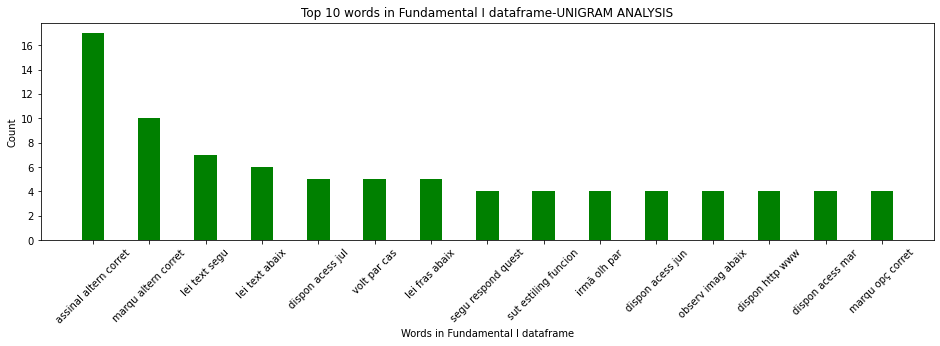

In [39]:
plt.figure(1,figsize=(16,4))
plt.bar(FI_1,FI_2, color ='green',
        width = 0.4)
plt.xlabel("Words in Fundamental I dataframe")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Top 10 words in Fundamental I dataframe-UNIGRAM ANALYSIS")
plt.show()

### plt.savefig("trigram.png")

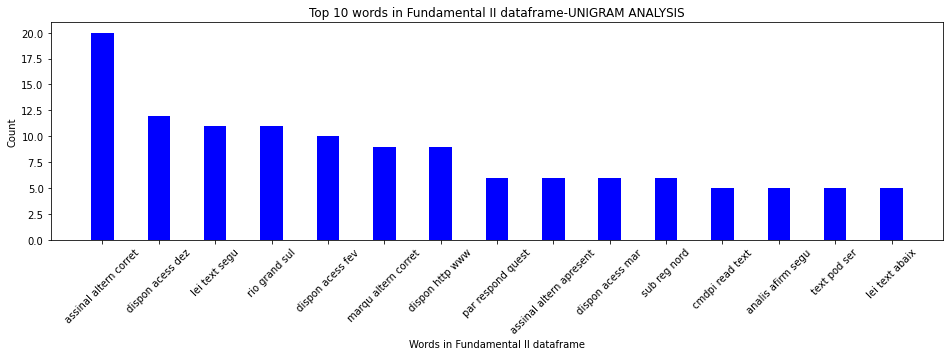

In [40]:
plt.figure(1,figsize=(16,4))
plt.bar(FII_1,FII_2, color ='blue',
        width = 0.4)
plt.xlabel("Words in Fundamental II dataframe")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Top 10 words in Fundamental II dataframe-UNIGRAM ANALYSIS")
plt.show()

### plt.savefig("trigram.png")

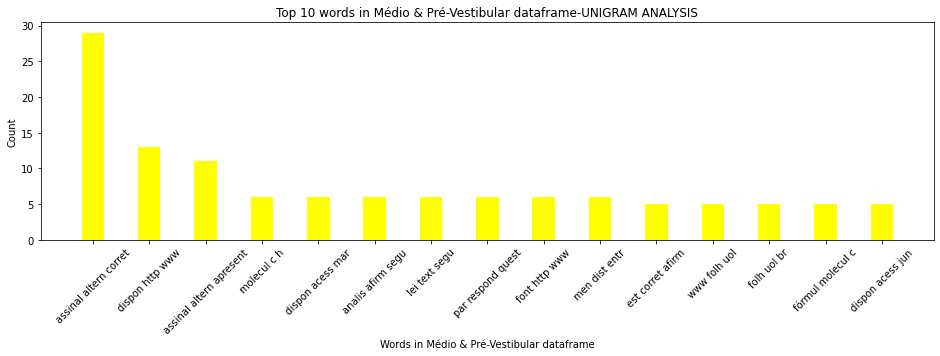

In [41]:
plt.figure(1,figsize=(16,4))
plt.bar(ME_1,ME_2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in Médio & Pré-Vestibular dataframe")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Top 10 words in Médio & Pré-Vestibular dataframe-UNIGRAM ANALYSIS")
plt.show()

### plt.savefig("trigram.png")

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range = (1,1))
X = cv.fit_transform(pilot['questoes_no_stopw'])
print(X.shape)

(2000, 10499)


In [25]:
p = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
p.head()

C:\Users\Danilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaaaaahhhhhh,aaaaahhhhhhhh,aaaiiiii,aarav,ab,abaaa,abacat,abaix,abal,...,úb,últ,úmid,únic,úric,úteis,útel,útil,ﬁnal,ﬂoat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
p.columns

[Index(['aa', 'aaaaaahhhhhh', 'aaaaahhhhhhhh', 'aaaiiiii', 'aarav', 'ab',
        'abaaa', 'abacat', 'abaix', 'abal',
        ...
        'úb', 'últ', 'úmid', 'únic', 'úric', 'úteis', 'útel', 'útil', 'ﬁnal',
        'ﬂoat'],
       dtype='object', length=10499)]

### Enconding with BOW

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizerBOW = CountVectorizer()
XBOW = vectorizerBOW.fit_transform(data_clone['questoes_no_stopw'])
XBOW

<83675x76546 sparse matrix of type '<class 'numpy.int64'>'
	with 2454469 stored elements in Compressed Sparse Row format>

### Enconding with TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizerTF = TfidfVectorizer()
XTF = vectorizerTF.fit_transform(data_clone['lemmatized_texts'])
XTF


<83675x124300 sparse matrix of type '<class 'numpy.float64'>'
	with 2462464 stored elements in Compressed Sparse Row format>

### Clusterizando com t-SNE

In [35]:
from sklearn.manifold import TSNE

X_embedded_BOW = TSNE(n_components=3, learning_rate='auto',init='random').fit_transform(XBOW) 
X_embedded_BOW.shape

### Criando modelo para Etapa de Ensino

In [72]:
from sklearn.model_selection import train_test_split

y = data_clone['etapaEnsino']

X = data_clone['lemmatized_texts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

XBOW_train, XBOW_test, y_train, y_test = train_test_split(XBOW, y, test_size=0.33, random_state=42)

XTF_train, XTF_test, y_train, y_test = train_test_split(XTF, y, test_size=0.33, random_state=42)

In [54]:
data_clone.columns

Index(['id', 'questoes', 'tipoQuestoes', 'topico', 'slug', 'materia', 'slug.1',
       'etapaEnsino', 'questoes_html', 'questoes_tags', 'questoes_lower',
       'questoes_numbers', 'questoes_punct', 'questoes_no_italic_quotes',
       'questoes_no_open_quotes', 'questoes_no_end_quotes',
       'questoes_no_italic_dquotes', 'questoes_no_open_dquotes',
       'questoes_no_end_dquotes', 'questoes_stopw_pt', 'questoes_stopw_en',
       'questoes_no_quotes', 'questoes_tokens', 'lemmatized_tokens'],
      dtype='object')

In [55]:
data_clone['questoes_no_quotes'].str.len().max()

63829

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [57]:
sgd_clf = SGDClassifier(random_state=123)
sgf_clf_scores = cross_val_score(sgd_clf, XTF_train, y_train, cv=5)
print(sgf_clf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (sgf_clf_scores.mean(), sgf_clf_scores.std() * 2))

[0.67047177 0.67858735 0.67088833 0.66910453 0.67704245]
Accuracy: 0.67 (+/- 0.01)


In [59]:
y_train.value_counts()

Médio & Pré-Vestibular    22250
Fundamental II            21856
Fundamental I             11956
Name: etapaEnsino, dtype: int64

In [62]:
sgf_clf_pred = cross_val_predict(sgd_clf, XTF_train, y_train, cv=5)
print(confusion_matrix(y_train, sgf_clf_pred))

[[ 7795  3030  1131]
 [ 2374 13140  6342]
 [  759  4684 16807]]


In [63]:
grid = {'fit_intercept': [True,False],
        'early_stopping': [True, False],
        'loss' : ['hinge', 'log', 'squared_hinge'],
        'penalty' : ['l2', 'l1', 'none']}
search = GridSearchCV(estimator=sgd_clf, param_grid=grid, cv=5)
search.fit(XTF_train, y_train)
search.best_params_

C:\Users\Danilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Danilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Danilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Danilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

{'early_stopping': False,
 'fit_intercept': False,
 'loss': 'log',
 'penalty': 'none'}

In [65]:
grid_sgd_clf_scores = cross_val_score(search.best_estimator_, XTF_train, y_train, cv=5)
print(grid_sgd_clf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (grid_sgd_clf_scores.mean(), grid_sgd_clf_scores.std() * 2))

[0.681352   0.68358156 0.67508027 0.68230467 0.68703175]
Accuracy: 0.68 (+/- 0.01)


In [73]:
pipe = Pipeline([('vectoriser', vectorizerTF),
                 ('classifier', search.best_estimator_)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectoriser', TfidfVectorizer()),
                ('classifier',
                 SGDClassifier(fit_intercept=False, loss='log', penalty='none',
                               random_state=123))])

In [74]:
y_test_pred = pipe.predict(X_test)
print("Accuracy: %0.2f" % (accuracy_score(y_test, y_test_pred)))
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.69
[[4182 1420  490]
 [1218 6834 2531]
 [ 506 2370 8062]]
